*Вариант 10*

In [18]:
import random as rd

Variant = 17
rd.seed(Variant)

Numbers_of_problems = [i+1 for i in rd.sample(range(14),3)]
Numbers_of_problems

[9, 7, 5]

**Задание 1**
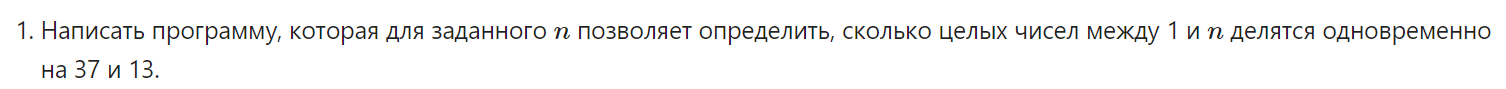

In [ ]:
#include <stdio.h>

int main() {
    int n;
    scanf("%d", &n);
    printf("%d\n", n / (37 * 13));
    return 0;
}

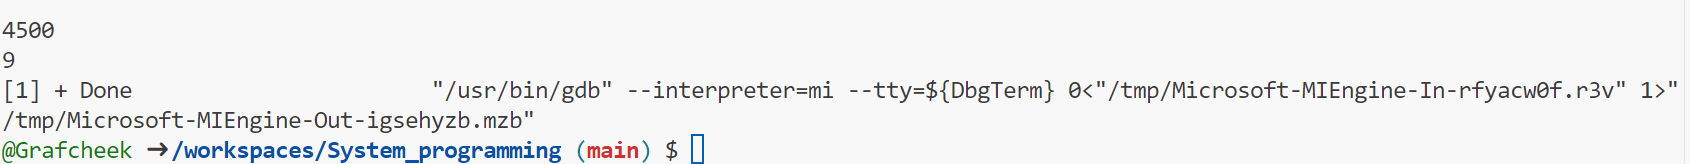

**Задание 7**
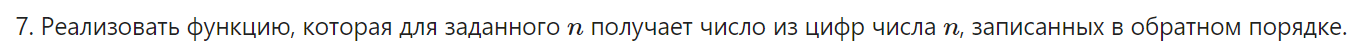

In [ ]:
#include <stdio.h>

int main() {
    int n, reversed = 0;
    
    scanf("%d", &n);
    
    while (n != 0) {
        reversed = reversed * 10 + n % 10;
        n /= 10;
    }
    
    printf("%d\n", reversed);
    
    return 0;
}

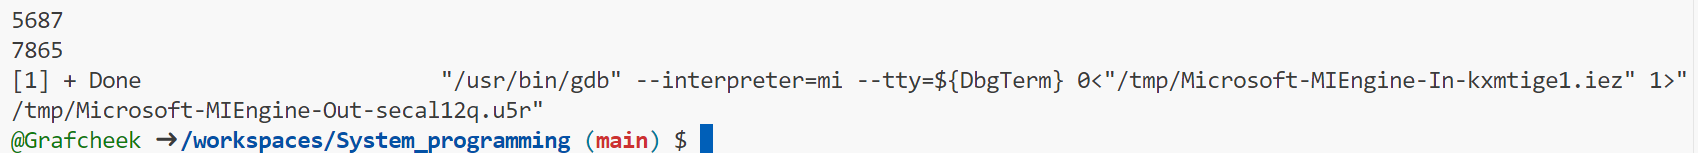

In [ ]:
format ELF64

public _start

section '.bss' writable
  place db 1
  buffer rb 256

section '.text' executable

include 'func.asm'

_start:
  mov rsi, buffer
  call input_keyboard

  mov rax, buffer
  call len_str

  mov rcx, rax
  dec rcx
  .loop:
    mov bl, [buffer+rcx]
    mov [place], bl

    mov rsi, place
    call print

    dec rcx
    cmp rcx, -1
    jg .loop

  call exit

  print:
    push rax
    push rdi
    push rdx
    push rcx
    mov rdx, 1
    mov rax, 1
    mov rdi, 1
    syscall
    pop rcx
    pop rdx
    pop rdi
    pop rax
    ret

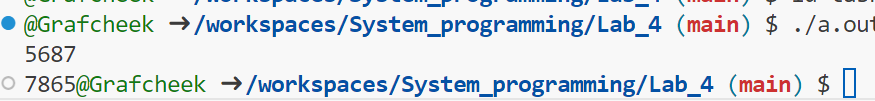

***Задание 10***
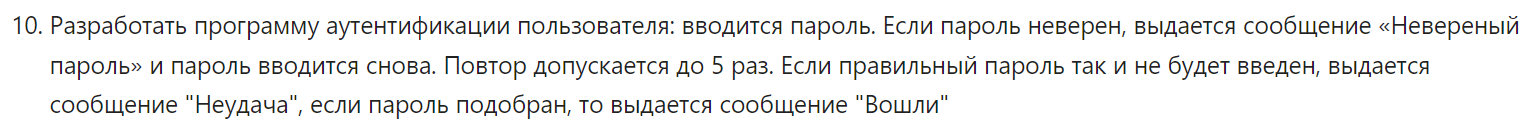

In [ ]:
#include <stdio.h>
#include <stdlib.h>
#include <string.h>

int main(){
    char password [] = "pass123";
    char in [20];
    for(int i = 0; i < 5; i++){
        scanf("%s", in);
        if(strcmp(in, password) == 0){
            printf("Вошли\n");
            return 0;
        } //!!!
        printf("Невереный пароль\n");
    }
    printf("Неудача\n");
    return 0;
}

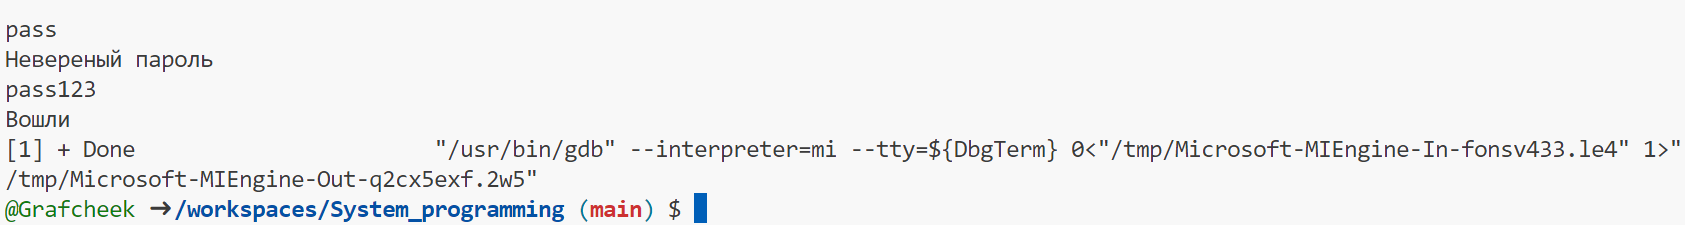

In [ ]:
format ELF64

public _start
public read
public compare

include '/workspaces/System_programming/Lab_4/func.asm'

section '.bss' writable
input dq ?
output dq ?
password db "pass123", 0
success db "Вошли", 0
failure db "Неудача", 0
retry db "Неверный пароль", 0

section '.text' executable
_start:
mov rsi, 5
mov rax, password
call len_str
mov r9, rax
.loop:
push rsi
call read
call compare
cmp r8, 1
je .suc
mov rsi, retry
call print_str
call new_line
pop rsi
dec rsi
cmp rsi, 0
jg .loop
mov rsi, failure
call print_str
call new_line
call exit
.suc:
mov rsi, success
call print_str
call new_line
call exit

read:
push rax
push rdi
push rsi
push rdx
mov rax, 0
mov rdi, 0
mov rsi, input
mov rdx, 255
syscall
mov rax, input
call len_str
mov byte [input + rax-1], 0
pop rax
pop rdi
pop rsi
pop rdx
ret

compare:
mov rax, input
mov rdx, password
mov rsi, -1
xor r8, r8
.loop:
inc rsi
cmp rsi, r9
jg .f1
mov bl, byte [rdx+rsi]
cmp byte [rax+rsi], bl
je .loop
.f1:
cmp byte [rax+rsi], bl
jne .notequal
mov r8, 1
ret
.notequal:
ret

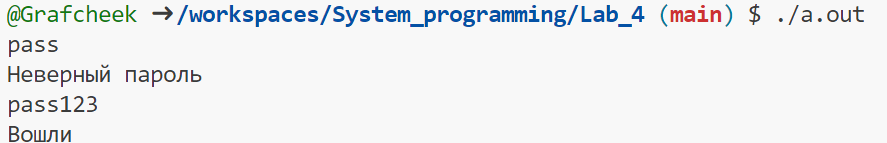